# Handwritten Digit Recognition using CNN on MNIST Dataset

This project builds a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. The MNIST dataset consists of grayscale images (28x28 pixels) of handwritten digits (0-9). Our model will classify each image into one of 10 categories (digits 0-9).

We use TensorFlow and Keras to construct the CNN model, which is highly efficient for image classification tasks.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


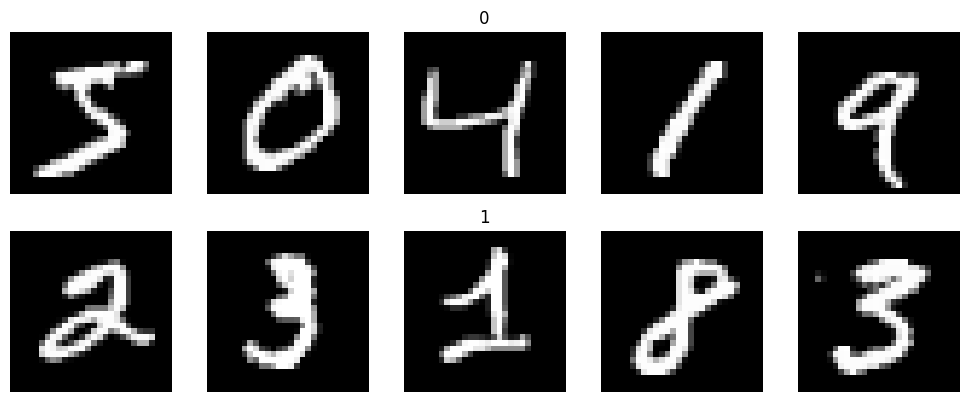

In [13]:
y_train_flat = y_train.flatten()

# Plot 5 samples from each digit (0-9)
plt.figure(figsize=(10, 20))

for digit in range(10):  # Iterate over digits 0-9
    indices = np.where(y_train_flat == digit)[0]  # Find indices of images with this digit
    selected_images = x_train[indices[:5]]  # Select first 5 images of the digit

    for i in range(len(selected_images)):  # Ensure we don't go out of bounds
        plt.subplot(10, 5, digit * 5 + i + 1)  # Arrange in 10 rows, 5 columns
        plt.imshow(selected_images[i], cmap="gray")
        plt.axis("off")
        if i == 2:  # Add digit label in the center image
            plt.title(str(digit))

plt.tight_layout()
plt.show()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8185 - loss: 0.5559 - val_accuracy: 0.9768 - val_loss: 0.0757
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9696 - loss: 0.1005 - val_accuracy: 0.9859 - val_loss: 0.0464
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9805 - loss: 0.0679 - val_accuracy: 0.9858 - val_loss: 0.0461
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9827 - loss: 0.0579 - val_accuracy: 0.9874 - val_loss: 0.0422
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 0.9893 - val_loss: 0.0357
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9880 - loss: 0.0366 - val_accuracy: 0.9877 - val_loss: 0.0457
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9909 - val_loss: 0.0364
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9908 - loss: 0.0309 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.10%


In [9]:
model.save("digit_recognition_cnn.h5")
print("Model saved as 'digit_recognition_cnn.h5'")

Model saved as 'digit_recognition_cnn.h5'


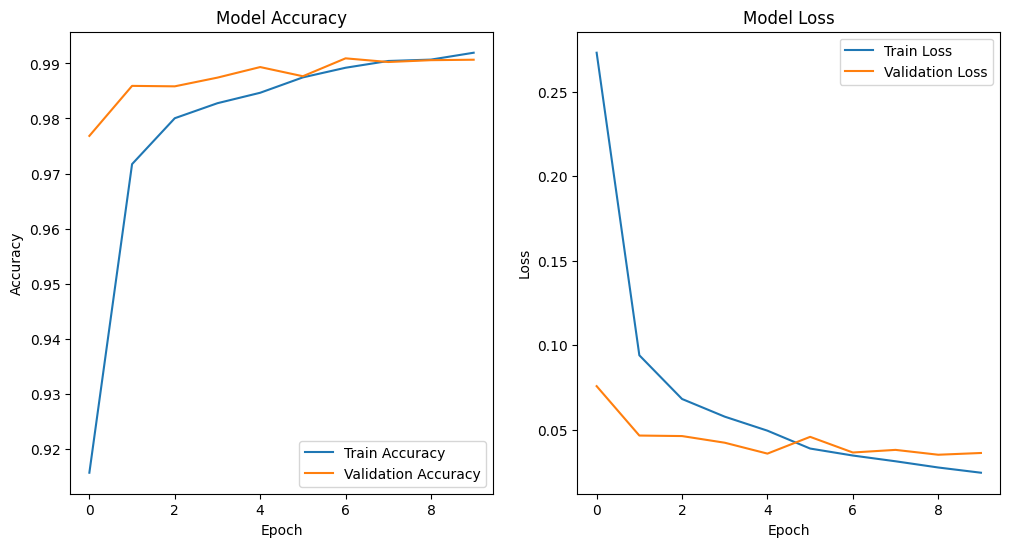

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()